Модель линейной регрессии на основе Boston dataset и TensorFlow: прогноз 1 параметра (стоимость дома) на основе 13 переменных.

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [0]:
# Загружаем данные:
X, y = load_boston(return_X_y=True)

In [0]:
# Делим данные на учебные и тестовые:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    shuffle=True)

In [0]:
# Создаем тенсоры:
train_x = tf.constant(X_train, dtype=tf.float32)
train_y = tf.constant(y_train, dtype=tf.float32)

test_x = tf.constant(X_test, dtype=tf.float32)
test_y = tf.constant(y_test, dtype=tf.float32)

In [0]:
# Создаем модель:
model = keras.Sequential([keras.layers.Dense(64, activation='relu', input_shape=[13]),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(1)])

In [0]:
# Определяем показатели оценки погрешности и оптимизатор:
model.compile(optimizer=keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae'])

In [7]:
# Общие сведения о модели:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Параметры для остановки обучения модели:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=30,
                                           restore_best_weights=True)

In [9]:
# Обучаем модель:
model.fit(train_x, train_y, validation_split=0.2,
          epochs=500, verbose=0, callbacks=[early_stop])

In [10]:
# Оцениваем точность модели на учебных данных:
mse, mae = model.evaluate(train_x, train_y)
print(f'\nTrain loss (MSE): {mse}\nTrain loss(MAE): {mae}')

13/13 [==============================] - 0s 1ms/step - loss: 20.7902 - mae: 3.1948

Train loss (MSE): 20.790172576904297
Train loss(MAE): 3.1948442459106445


In [11]:
# Оцениваем точность модели на тестовых данных:
mse, mae = model.evaluate(test_x, test_y)
print(f'\n\nTest loss (MSE): {mse}\nTest loss(MAE): {mae}')

4/4 [==============================] - 0s 2ms/step - loss: 32.1690 - mae: 4.0396


Test loss (MSE): 32.16898727416992
Test loss(MAE): 4.039575576782227


In [0]:
# Делаем прогноз:
prediction = model.predict(test_x)

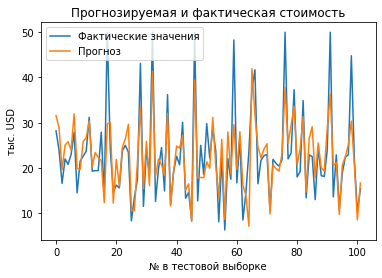

In [13]:
# Визуализируем прогноз и фактические данные:
plt.plot(range(len(prediction)), test_y, label='Фактические значения')
plt.plot(range(len(prediction)), prediction, label='Прогноз')
plt.legend()
plt.xlabel('№ в тестовой выборке')
plt.ylabel('тыс. USD')
plt.title('Прогнозируемая и фактическая стоимость')
plt.show()